<a href="https://colab.research.google.com/github/Jean-Rd/Algoritms_Intro_machineLearningWithPython/blob/master/metrics_reglin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
rios = pd.read_csv('https://raw.githubusercontent.com/rociochavezmx/Rocio-Chavez-youtube-Files/master/Rios.csv')
sns.set_style('dark')

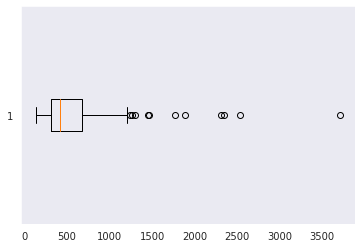

In [3]:
plt.boxplot(rios.Millas, vert=False)
plt.show()

In [4]:
Q1 = rios.Millas.quantile(0.25)
print('Primer quantil: {}'.format(Q1))
Q3 = rios.Millas.quantile(0.75)
print('Tercer quantile: {}'.format(Q3))
mediana = rios.Millas.median()
print('Segundo quantile o mediana: {}'.format(mediana))
IQR = Q3 - Q1
print('Rango inter quantil IQR: {}'.format(IQR))
min = rios.Millas.min()
print('Valor minimo: {}'.format(min))
max = rios.Millas.max()
print('Valor maximo: {}'.format(max))

Primer quantil: 310.0
Tercer quantile: 680.0
Segundo quantile o mediana: 425.0
Rango inter quantil IQR: 370.0
Valor minimo: 135
Valor maximo: 3710


In [5]:
B_inf = (Q1 - 1.5*IQR)
B_sup = (Q3 + 1.5*IQR)

print('Bigote inferior: {}'.format(B_inf))
B_2inf = (min)
# Como el valor de B_inf es negativo, nuestro nuevo bigote inferior es el valor minimo
print('Nuevo bigote inferior: {}'.format(min))
print('Bigote superior: {}'.format(B_sup))

Bigote inferior: -245.0
Nuevo bigote inferior: 135
Bigote superior: 1235.0


In [6]:
outliers = rios[(rios.Millas < B_2inf) | (rios.Millas > B_sup)]
outliers.sort_values('Rio')

data_sin_out = rios[(rios.Millas >= B_2inf) & (rios.Millas <= B_sup)]
data_sin_out.head()

,Rio,Millas
0,1,735
1,2,320
2,3,325
3,4,392
4,5,524


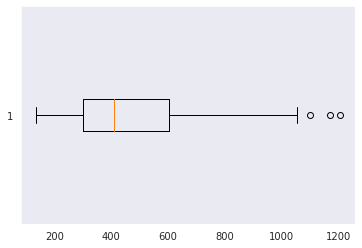

In [7]:
plt.boxplot(data_sin_out.Millas, vert=False)
plt.show()

In [8]:
Q_1 = data_sin_out.Millas.quantile(0.25)
Q_3 = data_sin_out.Millas.quantile(0.75)
_IQR = Q_3 - Q_1 
_min = data_sin_out.Millas.min()
_max = data_sin_out.Millas.max()
_mediana = data_sin_out.Millas.median()

print('Primer quantile: {}'.format(Q_1))
print('Tercer quantile: {}'.format(Q_3))
print('Mediana: {}'.format(_mediana))
print('IRQ: {}'.format(_IQR))
print('Minimo: {}'.format(_min))
print('Maximo: {}'.format(_max))

Primer quantile: 302.25
Tercer quantile: 603.75
Mediana: 408.5
IRQ: 301.5
Minimo: 135
Maximo: 1205


In [9]:
_Binf = (Q_1 - 1.5*_IQR)
_Bsup = (Q_3 + 1.5*_IQR)

print('Barra inferios: {}'.format(_Binf)) # nueva barra inferior por se negativa as min
_B2inf = (_min)
print('Nueva barra inferior: {}'.format(_B2inf))
print('Barra superior: {}'.format(_Bsup))

Barra inferios: -150.0
Nueva barra inferior: 135
Barra superior: 1056.0


In [10]:
with_out = data_sin_out[(data_sin_out.Millas < _B2inf)| (data_sin_out.Millas > _Bsup)]
with_out.sort_values('Rio')

,Rio,Millas
66,67,1171
113,114,1100
114,115,1205


In [11]:
without_out = data_sin_out[(data_sin_out.Millas >= _B2inf) & (data_sin_out.Millas <= _Bsup)]
without_out.shape

(127, 2)

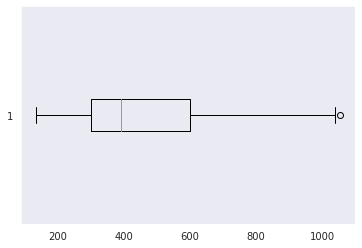

In [12]:
plt.boxplot(without_out.Millas, vert=False)
plt.show()

In [71]:
_Q1 = without_out.Millas.quantile(0.25)
_Q3 = without_out.Millas.quantile(0.75)
_median = without_out.Millas.median()
_IQR_ = _Q3 - _Q1
v_min = without_out.Millas.min()
v_max = without_out.Millas.max()

_Bi = (_Q1 - 1.5*_IQR_)
_Bs = (_Q3 + 1.5*_IQR_)

print('min: {}'.format(v_min))
print('max: {}'.format(v_max))
print('mediana: {}'.format(_median))
print('IQR: {}'.format(_IQR_))
print('Primer quantile: {}'.format(_Q1))
print('Tercer quantile: {}'.format(_Q3))
print(_Bi, _Bs)

min: 135
max: 1054
mediana: 392.0
IQR: 299.5
Primer quantile: 300.5
Tercer quantile: 600.0
-148.75 1049.25


In [46]:
out = without_out[(without_out.Millas < _Bi) | (without_out.Millas > _Bs)]
out

,Rio,Millas
88,89,1054


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


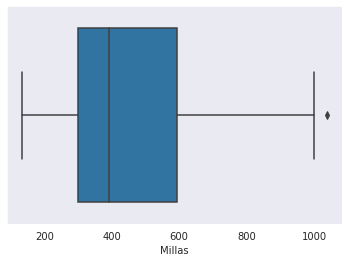

In [51]:
NoOut = without_out[(without_out >= _Bi) & (without_out <= _Bs)]

sns.boxplot(NoOut.Millas)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


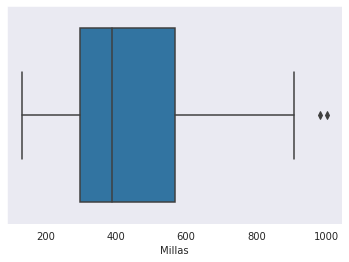

In [59]:
dta = NoOut[NoOut.Millas != NoOut.Millas.max()]

sns.boxplot(dta.Millas)
plt.show()

In [69]:
q1 = NoOut.Millas.quantile(0.25)
q3 = NoOut.Millas.quantile(0.75)

mediana = NoOut.Millas.median()
iqr = q3 - q1

miniman = NoOut.Millas.min()
maximan = NoOut.Millas.max()

bi = (q1 - 1.5*iqr)
bs = (q3 + 1.5*iqr)

print('quantile 1: {}'.format(q1))
print('quantile 3: {}'.format(q3))
print('iqr: {}'.format(iqr))
print('mediana: {}'.format(mediana))
binf = miniman
print('barra inf: {}, new: {}'.format(bi, binf))
print('barra sup: {}'.format(bs))

quantile 1: 300.25
quantile 3: 592.5
iqr: 292.25
mediana: 391.0
barra inf: -138.125, new: 135.0
barra sup: 1030.875


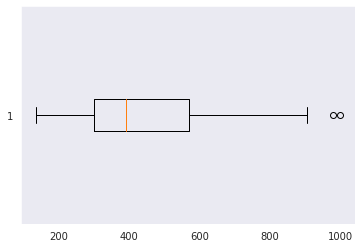

In [74]:
new = NoOut[(NoOut.Millas >= binf) & (NoOut.Millas <= bs)]

plt.boxplot(new.Millas, vert=False)
plt.show()

In [75]:
q1 = new.Millas.quantile(0.25)
q3 = new.Millas.quantile(0.75)

mediana = new.Millas.median()
iqr = q3 - q1

miniman = new.Millas.min()
maximan = new.Millas.max()

bi = (q1 - 1.5*iqr)
bs = (q3 + 1.5*iqr)

print('quantile 1: {}'.format(q1))
print('quantile 3: {}'.format(q3))
print('iqr: {}'.format(iqr))
print('mediana: {}'.format(mediana))
binf = miniman
print('barra inf: {}, new: {}'.format(bi, binf))
print('barra sup: {}'.format(bs))

quantile 1: 300.0
quantile 3: 570.0
iqr: 270.0
mediana: 390.0
barra inf: -105.0, new: 135.0
barra sup: 975.0


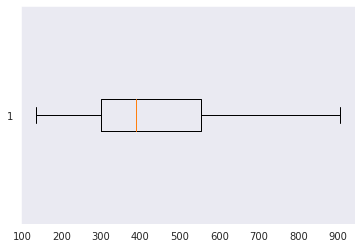

In [76]:
new = NoOut[(NoOut.Millas >= binf) & (NoOut.Millas <= bs)]

plt.boxplot(new.Millas, vert=False)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


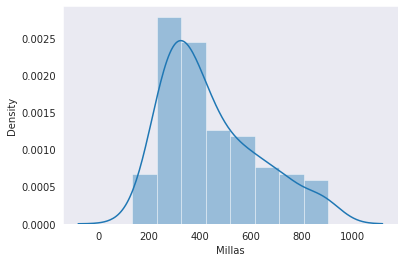

In [82]:
sns.distplot(new.Millas)

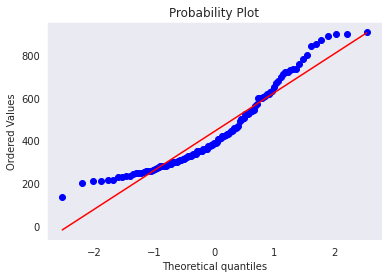

In [92]:
import scipy.stats as stats

stats.probplot(new.Millas, dist='norm', plot=plt)
plt.show()

In [101]:
from scipy.stats import shapiro

esocastico, p_value = shapiro(new.Millas)

print('stats: {:.2f}, p_value: {:2f}'.format(esocastico, p_value))

stats: 0.92, p_value: 0.000001


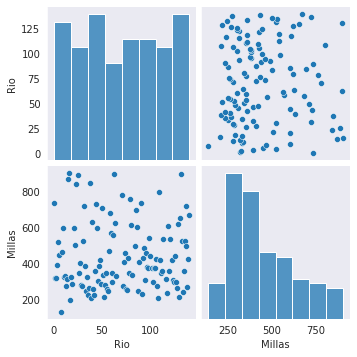

In [102]:
sns.pairplot(new)